In [32]:
from pylab import *
from scipy.optimize import minimize 

# All particle spectrum around the knee

## Auger data from Abreu et al., EPJC 81, 966 (2021)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [2]:
data_AUGER = np.genfromtxt("Data/AUGER_all_data.txt")
E_AUGER = data_AUGER[:,1]
flux_AUGER = data_AUGER[:,3]
error_AUGER_stat_low = data_AUGER[:,4]; error_AUGER_syst_low = data_AUGER[:,6]
error_AUGER_stat_up = data_AUGER[:,5]; error_AUGER_syst_up = data_AUGER[:,7]
error_AUGER_low = np.sqrt(error_AUGER_stat_low**2 + error_AUGER_syst_low**2)
error_AUGER_up = np.sqrt(error_AUGER_stat_up**2 + error_AUGER_syst_up**2)

## IceTop data from Aartsen et al., PhRvD 100, 082002 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

In [4]:
data_ICETOP = np.genfromtxt("Data/IceTop_all_data.txt")
E_ICETOP = data_ICETOP[:,1]
flux_ICETOP = data_ICETOP[:,3]
error_ICETOP_stat = data_ICETOP[:,4]; error_ICETOP_syst_low = data_ICETOP[:,5]; error_ICETOP_syst_up = data_ICETOP[:,6]
error_ICETOP_low = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_low**2)
error_ICETOP_up = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_up**2)

## TUNKA data from Prosin et al., NIMPA 756, 94 (2014)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err ($\pm$)

In [7]:
data_TUNKA = np.genfromtxt("Data/TUNKA_all_data.txt")
E_TUNKA = data_TUNKA[:,1]
flux_TUNKA = data_TUNKA[:,3]
error_TUNKA_stat = data_TUNKA[:,4]; error_TUNKA_syst = data_TUNKA[:,5]
error_TUNKA = np.sqrt(error_TUNKA_stat**2 + error_TUNKA_syst**2)

## HAWC data from Morales-Soto et al., ICRC 37, 330 (2022)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [11]:
data_HAWC = np.genfromtxt("Data/HAWC_all_data.txt")
E_HAWC= data_HAWC[:,1]
flux_HAWC = data_HAWC[:,3]
error_HAWC_stat_low = data_HAWC[:,4]; error_HAWC_syst_low = data_HAWC[:,6]
error_HAWC_stat_up = data_HAWC[:,5]; error_HAWC_syst_up = data_HAWC[:,7]
error_HAWC_low = np.sqrt(error_HAWC_stat_low**2 + error_HAWC_syst_low**2)
error_HAWC_up = np.sqrt(error_HAWC_stat_up**2 + error_HAWC_syst_up**2)

## KASCADE data from Antoni et al., APh 24, 1 (2005)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err ($\pm$)

In [21]:
data_KASCADE = np.genfromtxt("Data/KASCADE_all_data.txt")
E_KASCADE = data_KASCADE[:,1]
flux_KASCADE = data_KASCADE[:,3]
error_KASCADE_stat = data_KASCADE[:,4]; error_KASCADE_syst = data_KASCADE[:,5]
error_KASCADE = np.sqrt(error_KASCADE_stat**2 + error_KASCADE_syst**2)

## NUCLEON data from Grebenyuk et al., AdSpR 64, 2546 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err ($\pm$) $\quad$ [5] Syst Err

In [22]:
data_NUCLEON = np.genfromtxt("Data/NUCLEON_all_data.txt")
E_NUCLEON = data_NUCLEON[:,1]
flux_NUCLEON = data_NUCLEON[:,3]
error_NUCLEON = data_NUCLEON[:,4]

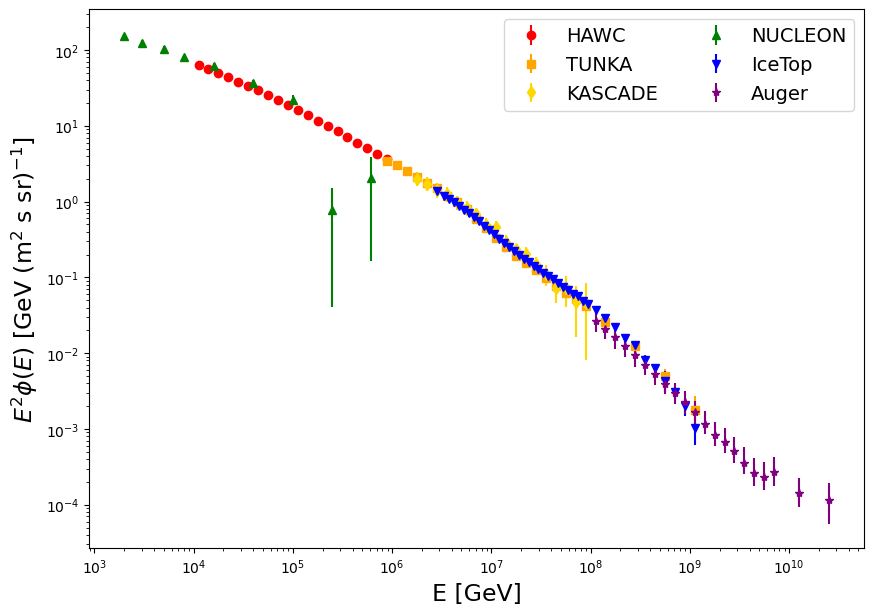

In [24]:
plt.figure(figsize=(10, 7))
plt.errorbar(E_HAWC, flux_HAWC * E_HAWC**2, yerr=(error_HAWC_low,error_HAWC_up) * E_HAWC**2, fmt='o', color='red', label='HAWC')
plt.errorbar(E_TUNKA, flux_TUNKA * E_TUNKA**2, yerr=error_TUNKA * E_TUNKA**2, fmt='s', color='orange', label='TUNKA')
plt.errorbar(E_KASCADE, flux_KASCADE * E_KASCADE**2, yerr=error_KASCADE * E_KASCADE**2, fmt='d', color='gold', label='KASCADE')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2, yerr=error_NUCLEON * E_NUCLEON**2, fmt='^', color='green', label='NUCLEON')
plt.errorbar(E_ICETOP, flux_ICETOP * E_ICETOP**2, yerr=(error_ICETOP_low,error_ICETOP_up) * E_ICETOP**2, fmt='v', color='blue', label='IceTop')
plt.errorbar(E_AUGER, flux_AUGER * E_AUGER**2, yerr=(error_AUGER_low,error_AUGER_up) * E_AUGER**2, fmt='*', color='purple', label='Auger')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2}\phi(E)$ [GeV (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)

In [83]:
def Phi_Knee(E, K, E0, alpha1, alpha2, omega, Eb):
    delta1 = alpha2 - alpha1
    return K * (E/E0)**(-alpha1) * (1 + (E/Eb)**(1/omega))**(-delta1 * omega)

In [90]:
E = np.append(np.append(np.append(E_HAWC, E_TUNKA), E_KASCADE), E_ICETOP)
Flux = np.append(np.append(np.append(flux_HAWC, flux_TUNKA), flux_KASCADE), flux_ICETOP)
Sigma = np.append(np.append(np.append(error_HAWC_low+error_HAWC_up, 2*error_TUNKA), 2*error_KASCADE), error_ICETOP_low+error_ICETOP_up)

index = np.where(np.logical_and(E>=1e4, E<=1e10))

E = E[index]
Flux = Flux[index]
Sigma = Sigma[index]

In [91]:
def Chi(parameters):
    K, E0, alpha1, alpha2, omega, Eb = parameters
    Phi_model = Phi_Knee(E, K, E0, alpha1, alpha2, omega, Eb)
    return sum( (Phi_model - Flux)**2 / Sigma**2) / (len(Flux) - len(parameters))

In [92]:
# Initial guess
alpha1 = 2.7
alpha2 = 3.1
Eb = 0.67 * 1e3
omega = 0.27
K = 4.40 * 10**(1)
E0 = 4 * 1e5

# Minimization of chi^2
output = minimize(Chi, (K, E0, alpha1, alpha2, omega, Eb), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3)); print('E_0:', round(best_fit_values[1],3), 'GeV'); 
print('alpha_1:', round(best_fit_values[2],3)); print('alpha_2:', round(best_fit_values[3],3)); 
print('omega:', round(best_fit_values[4],3)); print('E_b:', round(best_fit_values[5],3), 'GeV')

BEST FIT VALUES:
K: 43.985
E_0: 400000.0 GeV
alpha_1: -1.521
alpha_2: 2.863
omega: 0.275
E_b: 669.996 GeV


In [93]:
logE = np.arange(4,8,0.1)
E = 10**logE
K, E0, alpha1, alpha2, omega, Eb = best_fit_values
Phi_fit = Phi_Knee(E, K, E0, alpha1, alpha2, omega, Eb)

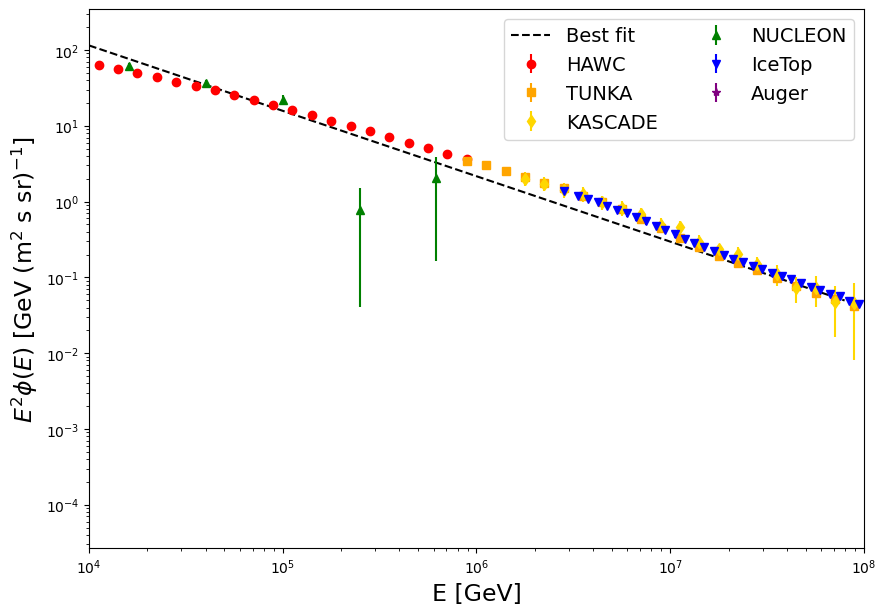

In [94]:
plt.figure(figsize=(10, 7))
plt.plot(E, Phi_fit * E**2, '--', color='black', label='Best fit')
plt.errorbar(E_HAWC, flux_HAWC * E_HAWC**2, yerr=(error_HAWC_low,error_HAWC_up) * E_HAWC**2, fmt='o', color='red', label='HAWC')
plt.errorbar(E_TUNKA, flux_TUNKA * E_TUNKA**2, yerr=error_TUNKA * E_TUNKA**2, fmt='s', color='orange', label='TUNKA')
plt.errorbar(E_KASCADE, flux_KASCADE * E_KASCADE**2, yerr=error_KASCADE * E_KASCADE**2, fmt='d', color='gold', label='KASCADE')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2, yerr=error_NUCLEON * E_NUCLEON**2, fmt='^', color='green', label='NUCLEON')
plt.errorbar(E_ICETOP, flux_ICETOP * E_ICETOP**2, yerr=(error_ICETOP_low,error_ICETOP_up) * E_ICETOP**2, fmt='v', color='blue', label='IceTop')
plt.errorbar(E_AUGER, flux_AUGER * E_AUGER**2, yerr=(error_AUGER_low,error_AUGER_up) * E_AUGER**2, fmt='*', color='purple', label='Auger')
plt.loglog()
plt.xlim(1e4,1e8)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2}\phi(E)$ [GeV (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)